In [1]:
# import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

### Start working on a real dataset

We're going to use the House Price dataset we used last time ([link text](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=train.csv))

Try to upload the dataset on your Google Drive and access it through Colab.

In [2]:
# find the file on your system and copy and paste the path here
FILE_PATH = "./content/train.csv"
df = pd.read_csv(FILE_PATH)

In [3]:
# show all the columns
pd.set_option('display.max_columns', None)

In [4]:
# print the shape of the dataset
print(df.shape)

(1460, 81)


In [5]:
# check the data types
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [6]:
# take a look at the first few records
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
# take a look at the columns
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

<Axes: >

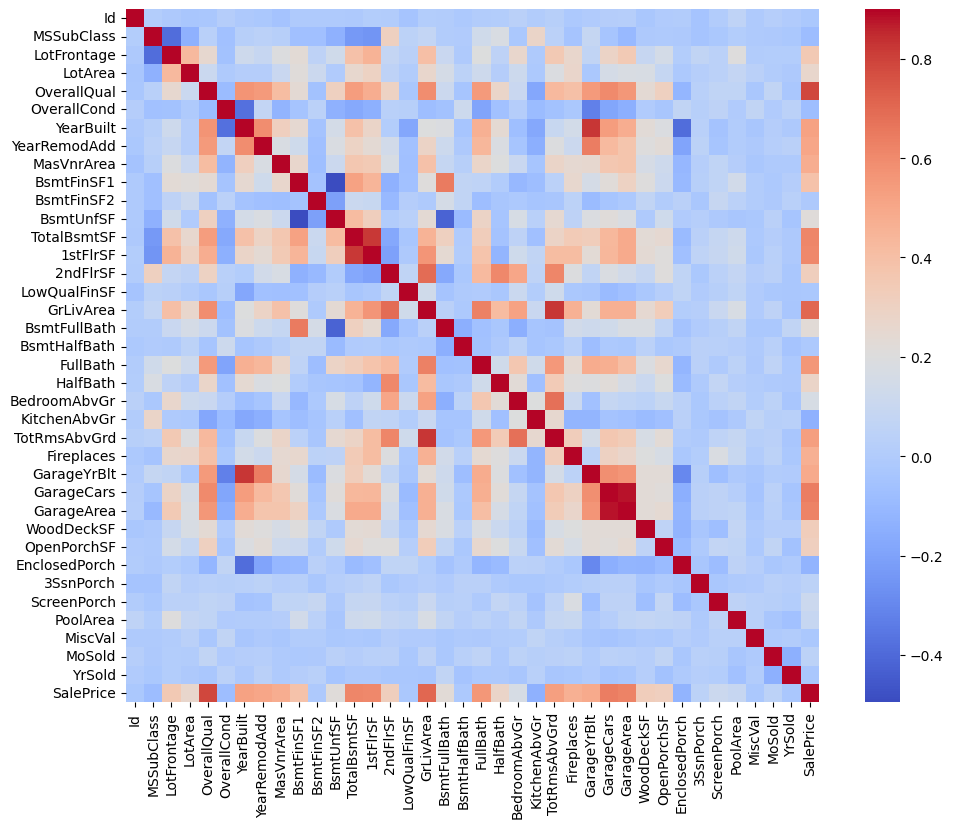

In [8]:
# look at the correlation of columns with .corr()
# plot the correlations with sns.heatmap
import matplotlib.pyplot as plt
import seaborn as sns
corrmat = df.corr(numeric_only=True)
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True, cmap='coolwarm')

The highest corrolations are with the following columns:
 Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea'], dtype='object')


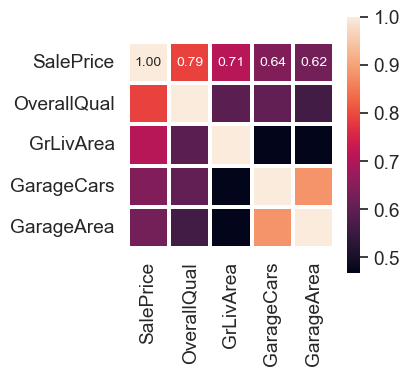

In [9]:
# run the code bellow to have a better view of corrolations
def plot_corr_matrix(df, nr_c, targ) :
    """
    A function for getting the features with the highest
    corrolation with the target variable.
    """

    # get the values
    corr = df.corr(numeric_only=True)
    corr_abs = corr.abs()

    # get the names in the largest to smallest order
    cols = corr_abs.nlargest(nr_c, targ)[targ].index
    cm = np.corrcoef(df[cols].values.T)

    # plot the figure
    plt.figure(figsize=(nr_c/1.5, nr_c/1.5))
    sns.set(font_scale=1.25)
    sns.heatmap(cm, linewidths=1.5, annot=True, square=True,
                fmt='.2f', annot_kws={'size': 10},
                yticklabels=cols.values, xticklabels=cols.values)
    print('The highest corrolations are with the following columns:\n', cols)
    plt.show()

plot_corr_matrix(df, nr_c=5, targ='SalePrice')

In [10]:
# copy the list of columns printed out on the output of previous code cell
# and paste it here
columns_to_use = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea']

# filter the above columns of the dataset and save the new dataset into df_sample
df_sample = df.loc[:, columns_to_use]

In [11]:
# look into the number of nulls we have in df_sample
null_counts = df.isnull().sum()
print(null_counts)


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [12]:
# take a look at the sampled dataset
df_sample

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea
0,208500,7,1710,2,548
1,181500,6,1262,2,460
2,223500,7,1786,2,608
3,140000,7,1717,3,642
4,250000,8,2198,3,836
...,...,...,...,...,...
1455,175000,6,1647,2,460
1456,210000,6,2073,2,500
1457,266500,7,2340,1,252
1458,142125,5,1078,1,240


Text(0.5, 0, 'GrLivArea')

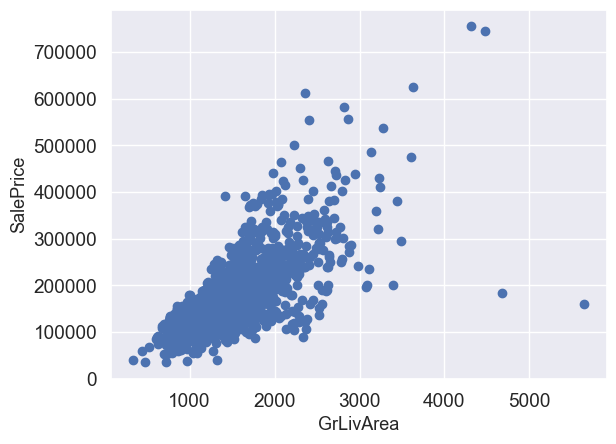

In [13]:
# plot GrLivArea against SalePrice with a scatter plot
fig, ax = plt.subplots()
ax.scatter(x= df_sample['GrLivArea'], y = df_sample['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)


Text(0.5, 0, 'GrLivArea')

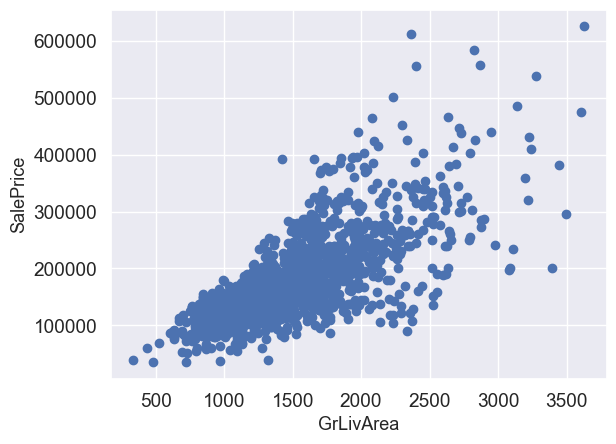

In [14]:
# Delete the outliers (ones that have GrLivArea more than 4000)
threshold = 4000
df_sample =  df_sample.drop(df[df['GrLivArea']> 4000].index)

# plot it again
fig, ax = plt.subplots()
ax.scatter(x= df_sample['GrLivArea'], y = df_sample['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)

In [15]:
# create a variable called X_columns and put all the column names
# (except for your target column name) in it
x_columns= [col for col in df_sample.columns if col != "SalePrice"]

print(x_columns)

# filter df_sample based on the x_column_names and your target name
X = df_sample.loc[:, x_columns]
y = df_sample.loc[:, 'SalePrice']

# build the train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea']


In [16]:
# import the libraries for regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [17]:
# Initialize and train a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)
# Make predictions
linear_predictions = linear_model.predict(X_test)

# Evaluate the model
linear_mae = mean_absolute_error(y_test,linear_predictions)
linear_rmse = np.sqrt(mean_squared_error(y_test, linear_predictions))

print("Linear Regression")
print(f"Mean absolute error: {linear_mae}")
print(f"Root squared error: {linear_mae}")



Linear Regression
Mean absolute error: 27366.42154443766
Root squared error: 27366.42154443766


In [27]:
# Initialize and train a Ridge regression model
ridge_model = Ridge(alpha=0.2)
ridge_model.fit(X_train,y_train)

# Make predictions
ridge_predictions = ridge_model.predict(X_test)

# Evaluate the model
ridge_mae = mean_absolute_error(y_test,ridge_predictions)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_predictions))

print("Ridge Regression")
print(f"Mean absolute error: {ridge_mae}")
print(f"Root squared error: {ridge_rmse}")


Ridge Regression
Mean absolute error: 27366.05866428688
Root squared error: 35585.057140565674


In [28]:
# Initialize and train a Lasso regression model
lasso_model = Lasso(alpha=0.2, max_iter=100)
lasso_model.fit(X_train,y_train)

# Make predictions
lasso_predictions = lasso_model.predict(X_test)

# Evaluate the model
lasso_mae = mean_absolute_error(y_test,lasso_predictions)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_predictions))

print("lasso Regression")
print(f"Mean absolute error: {lasso_mae}")
print(f"Root squared error: {lasso_rmse}")

lasso Regression
Mean absolute error: 27366.450021348413
Root squared error: 35585.07004124579


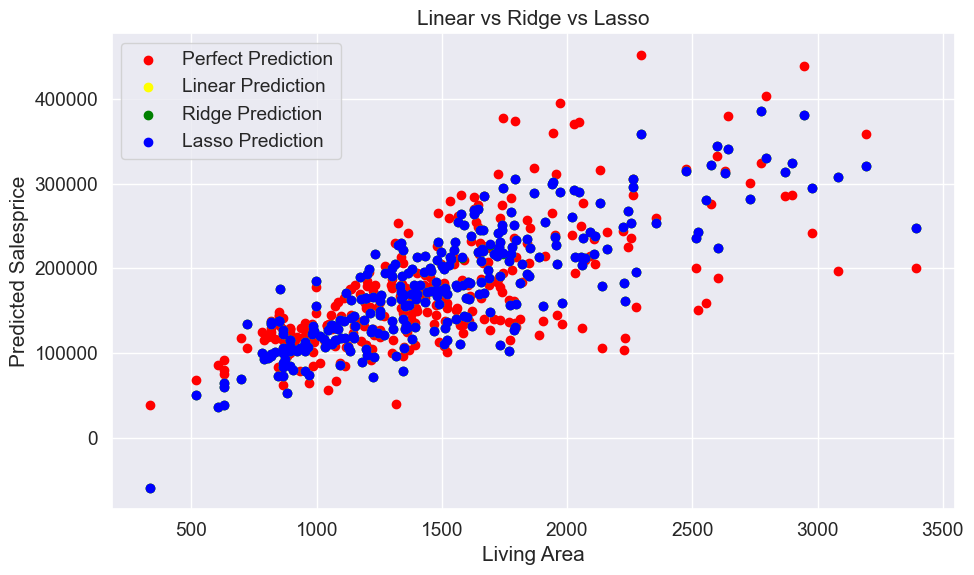

In [30]:
import matplotlib.pyplot as plt
col = 'GrLivArea'

plt.figure(figsize=(10, 6))

# Add a reference line for a perfect prediction (y_test = predictions)
plt.scatter(X_test[col], y_test, color = 'red', label = 'Perfect Prediction')

# Create a scatter plot for Linear Regression
plt.scatter(X_test[col], linear_predictions, color = 'yellow', label = 'Linear Prediction')


# Create a scatter plot for Ridge Regression
plt.scatter(X_test[col], ridge_predictions, color = 'green', label = 'Ridge Prediction')


# Create a scatter plot for Lasso Regression
plt.scatter(X_test[col], lasso_predictions, color = 'blue', label = 'Lasso Prediction')



# Set plot labels and title
plt.xlabel('Living Area')
plt.ylabel('Predicted Salesprice')
plt.title('Linear vs Ridge vs Lasso')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

* How are weights calculated: [link](https://towardsdatascience.com/step-by-step-tutorial-on-linear-regression-with-stochastic-gradient-descent-1d35b088a843)

* Why is Lasso harder on coefficients in comparison to Ridge? [link](https://online.stat.psu.edu/stat508/lesson/5/5.4)

* Regression requirements: [link](https://www.youtube.com/watch?v=0MFpOQRY0rw&ab_channel=zedstatistics)

* Linear regression in sklearn: [link](https://scikit-learn.org/stable/modules/linear_model.html#linear-models)

* Lasso Regression


### Add and convert categorical columns to numerical

In [31]:
# filter the dataset based on the following columns
columns_to_use = ['LotArea', 'YrSold', 'GarageArea', 'GarageYrBlt',
                  'GrLivArea', 'OverallQual', 'ExterQual', 'YearBuilt',
                  'MSZoning', 'KitchenQual',
                  'SalePrice']

# save the new dataset into df_sample
df_sample = df[columns_to_use]

In [32]:
# take a look at the dataset
df_sample

,LotArea,YrSold,GarageArea,GarageYrBlt,GrLivArea,OverallQual,ExterQual,YearBuilt,MSZoning,KitchenQual,SalePrice
0,8450,2008,548,2003.0,1710,7,Gd,2003,RL,Gd,208500
1,9600,2007,460,1976.0,1262,6,TA,1976,RL,TA,181500
2,11250,2008,608,2001.0,1786,7,Gd,2001,RL,Gd,223500
3,9550,2006,642,1998.0,1717,7,TA,1915,RL,Gd,140000
4,14260,2008,836,2000.0,2198,8,Gd,2000,RL,Gd,250000
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,2007,460,1999.0,1647,6,TA,1999,RL,TA,175000
1456,13175,2010,500,1978.0,2073,6,TA,1978,RL,TA,210000
1457,9042,2010,252,1941.0,2340,7,Ex,1941,RL,Gd,266500
1458,9717,2010,240,1950.0,1078,5,TA,1950,RL,Gd,142125


In [36]:
# look into the number of nulls we have
# (sort the values to have the emptiest column on top)
df_sample.isnull().sum().sort_values(ascending=False)

LotArea        0
YrSold         0
GarageArea     0
GarageYrBlt    0
GrLivArea      0
OverallQual    0
ExterQual      0
YearBuilt      0
MSZoning       0
KitchenQual    0
SalePrice      0
dtype: int64

In [34]:
# fillna with mean for: GarageYrBlt
mean_garage_yr_blt = df_sample['GarageYrBlt'].mean()

# Fill null values in the 'GarageYrBlt' column with the mean
df_sample['GarageYrBlt'].fillna(mean_garage_yr_blt, inplace=True)

C:\Users\taimo\AppData\Local\Temp\ipykernel_7744\1333439164.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample['GarageYrBlt'].fillna(mean_garage_yr_blt, inplace=True)


In [35]:
# Check if nulls have been filled
print(df_sample['GarageYrBlt'].isnull().sum())

0


In [37]:
# import the label encoder
from sklearn.preprocessing import LabelEncoder

# create a second dataset from the first dataset
df_transformed = df_sample.copy()

# define the categorical columns
cols = ('KitchenQual', 'ExterQual', 'MSZoning')

# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(df_transformed[c].values))
    df_transformed[c] = lbl.transform(list(df_transformed[c].values))



In [38]:
# look at the transformed version
# is everything looking good?

df_transformed

,LotArea,YrSold,GarageArea,GarageYrBlt,GrLivArea,OverallQual,ExterQual,YearBuilt,MSZoning,KitchenQual,SalePrice
0,8450,2008,548,2003.0,1710,7,2,2003,3,2,208500
1,9600,2007,460,1976.0,1262,6,3,1976,3,3,181500
2,11250,2008,608,2001.0,1786,7,2,2001,3,2,223500
3,9550,2006,642,1998.0,1717,7,3,1915,3,2,140000
4,14260,2008,836,2000.0,2198,8,2,2000,3,2,250000
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,2007,460,1999.0,1647,6,3,1999,3,3,175000
1456,13175,2010,500,1978.0,2073,6,3,1978,3,3,210000
1457,9042,2010,252,1941.0,2340,7,0,1941,3,2,266500
1458,9717,2010,240,1950.0,1078,5,3,1950,3,2,142125


In [39]:
# Now let's go back to the original dataset "df_sample" by saving it in df_transformed to try another type of encoding
df_transformed = df_sample.copy()
df_transformed

,LotArea,YrSold,GarageArea,GarageYrBlt,GrLivArea,OverallQual,ExterQual,YearBuilt,MSZoning,KitchenQual,SalePrice
0,8450,2008,548,2003.0,1710,7,Gd,2003,RL,Gd,208500
1,9600,2007,460,1976.0,1262,6,TA,1976,RL,TA,181500
2,11250,2008,608,2001.0,1786,7,Gd,2001,RL,Gd,223500
3,9550,2006,642,1998.0,1717,7,TA,1915,RL,Gd,140000
4,14260,2008,836,2000.0,2198,8,Gd,2000,RL,Gd,250000
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,2007,460,1999.0,1647,6,TA,1999,RL,TA,175000
1456,13175,2010,500,1978.0,2073,6,TA,1978,RL,TA,210000
1457,9042,2010,252,1941.0,2340,7,Ex,1941,RL,Gd,266500
1458,9717,2010,240,1950.0,1078,5,TA,1950,RL,Gd,142125


In [42]:
# use ordinal encoder to transform kitchen quality (KitchenQual)
from sklearn.preprocessing import OrdinalEncoder

order = ['Fa','TA','Gd','Ex']
columns_with_order = ['ExterQual', 'KitchenQual']

for col in columns_with_order:
    ord_en = OrdinalEncoder(categories= [order])
    df_transformed[col] = ord_en.fit_transform(df_transformed[[col]])


In [45]:
# take a look at the kitchQual in df_sample
df_sample.loc[:, 'KitchenQual'].values

array(['Gd', 'TA', 'Gd', ..., 'Gd', 'Gd', 'TA'], dtype=object)

In [46]:
# take a look at the kitchQual in df_transformed
df_transformed.loc[:, 'KitchenQual'].values

array([2., 1., 2., ..., 2., 2., 1.])

In [47]:
# Specify the columns to be one-hot encoded (MSZoning)
# Perform one-hot encoding
encoded_df = pd.get_dummies(df_transformed[["MSZoning"]])

# Concatenate the encoded columns with the original dataset
df_transformed = pd.concat([df_transformed, encoded_df], axis=1)

# Display the modified dataset
df_transformed

,LotArea,YrSold,GarageArea,GarageYrBlt,GrLivArea,OverallQual,ExterQual,YearBuilt,MSZoning,KitchenQual,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,8450,2008,548,2003.0,1710,7,2.0,2003,RL,2.0,208500,False,False,False,True,False
1,9600,2007,460,1976.0,1262,6,1.0,1976,RL,1.0,181500,False,False,False,True,False
2,11250,2008,608,2001.0,1786,7,2.0,2001,RL,2.0,223500,False,False,False,True,False
3,9550,2006,642,1998.0,1717,7,1.0,1915,RL,2.0,140000,False,False,False,True,False
4,14260,2008,836,2000.0,2198,8,2.0,2000,RL,2.0,250000,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,2007,460,1999.0,1647,6,1.0,1999,RL,1.0,175000,False,False,False,True,False
1456,13175,2010,500,1978.0,2073,6,1.0,1978,RL,1.0,210000,False,False,False,True,False
1457,9042,2010,252,1941.0,2340,7,3.0,1941,RL,2.0,266500,False,False,False,True,False
1458,9717,2010,240,1950.0,1078,5,1.0,1950,RL,2.0,142125,False,False,False,True,False


In [50]:
# drop the columns you transformed and keep the converted versions
df_transformed.drop(columns=['MSZoning'], inplace=True)

In [51]:
# define the variables we want to use for X (everything except for 'SalePrice')
x_columns= [col for col in df_transformed.columns if col != "SalePrice"]

# create X and y
X = df_transformed.loc[:, x_columns]
y = df_transformed.loc[:, 'SalePrice']

# build the train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# View X_train. Is everything looking good?
X_train

,LotArea,YrSold,GarageArea,GarageYrBlt,GrLivArea,OverallQual,ExterQual,YearBuilt,KitchenQual,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
254,8400,2010,294,1957.000000,1314,5,1.0,1957,1.0,False,False,False,True,False
1066,7837,2009,380,1993.000000,1571,6,2.0,1993,1.0,False,False,False,True,False
638,8777,2008,0,1978.506164,796,5,1.0,1910,1.0,False,False,False,True,False
799,7200,2007,240,1939.000000,1768,5,1.0,1937,2.0,False,False,False,True,False
380,5000,2010,308,1924.000000,1691,5,1.0,1924,2.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,9317,2007,440,2006.000000,1314,6,2.0,2006,2.0,False,False,False,True,False
1130,7804,2009,576,1981.000000,1981,4,1.0,1928,2.0,False,False,False,True,False
1294,8172,2006,572,1957.000000,864,5,1.0,1955,1.0,False,False,False,True,False
860,7642,2007,216,1925.000000,1426,7,2.0,1918,2.0,False,False,False,True,False


In [53]:
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)
# Make predictions
linear_predictions = linear_model.predict(X_test)

# Evaluate the model
linear_mae = mean_absolute_error(y_test,linear_predictions)
linear_rmse = np.sqrt(mean_squared_error(y_test, linear_predictions))

print("Linear Regression")
print(f"Mean absolute error: {linear_mae}")
print(f"Root squared error: {linear_mae}")


Linear Regression
Mean absolute error: 24122.96119970865
Root squared error: 24122.96119970865


In [54]:
# Initialize and train a Ridge regression model
ridge_model = Ridge(alpha=0.2)
ridge_model.fit(X_train,y_train)

# Make predictions
ridge_predictions = ridge_model.predict(X_test)

# Evaluate the model
ridge_mae = mean_absolute_error(y_test,ridge_predictions)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_predictions))

print("Ridge Regression")
print(f"Mean absolute error: {ridge_mae}")
print(f"Root squared error: {ridge_rmse}")


Ridge Regression
Mean absolute error: 24124.429889040337
Root squared error: 38890.70583632081


In [55]:
# Initialize and train a Lasso regression model
lasso_model = Lasso(alpha=0.2, max_iter=100)
lasso_model.fit(X_train,y_train)

# Make predictions
lasso_predictions = lasso_model.predict(X_test)

# Evaluate the model
lasso_mae = mean_absolute_error(y_test,lasso_predictions)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_predictions))

print("lasso Regression")
print(f"Mean absolute error: {lasso_mae}")
print(f"Root squared error: {lasso_rmse}")


lasso Regression
Mean absolute error: 24123.31619049077
Root squared error: 38888.97325889125


c:\Users\taimo\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.231e+11, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(


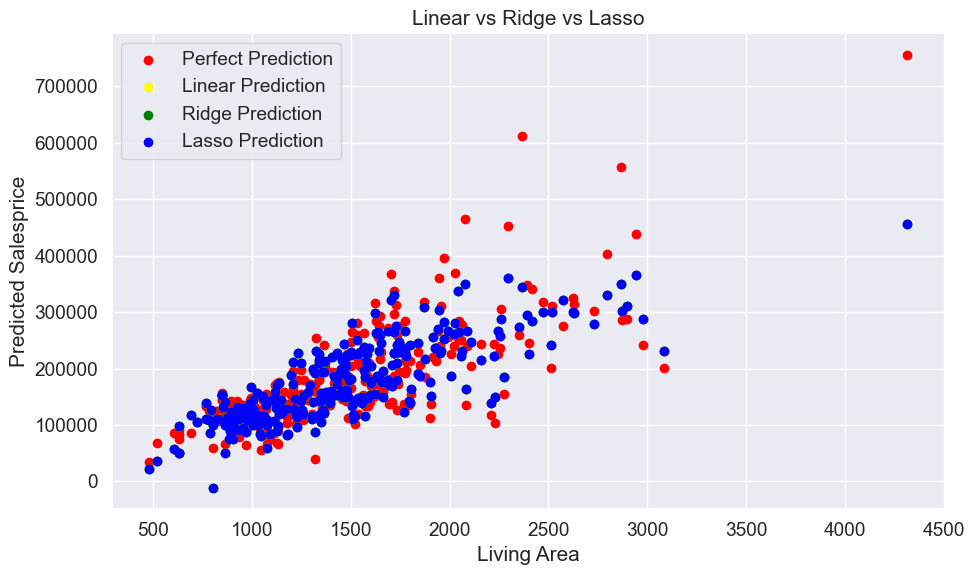

In [56]:
import matplotlib.pyplot as plt
col = 'GrLivArea'

plt.figure(figsize=(10, 6))

# Add a reference line for a perfect prediction (y_test = predictions)
plt.scatter(X_test[col], y_test, color = 'red', label = 'Perfect Prediction')

# Create a scatter plot for Linear Regression
plt.scatter(X_test[col], linear_predictions, color = 'yellow', label = 'Linear Prediction')


# Create a scatter plot for Ridge Regression
plt.scatter(X_test[col], ridge_predictions, color = 'green', label = 'Ridge Prediction')


# Create a scatter plot for Lasso Regression
plt.scatter(X_test[col], lasso_predictions, color = 'blue', label = 'Lasso Prediction')



# Set plot labels and title
plt.xlabel('Living Area')
plt.ylabel('Predicted Salesprice')
plt.title('Linear vs Ridge vs Lasso')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()



### Optional for now

### What if we didn't have normalized features?


In [ ]:
# Calculate the mean and standard deviation for each feature
mean = np.mean(X, axis=0)
std_dev = np.std(X, axis=0)

# Normalize the features using z-score standardization
X_normalized = (X - mean) / std_dev

# Now, X_normalized contains your normalized features
X_normalized

array([[-0.11880088,  1.30830738, -1.94596119, ..., -0.0799718 ,
         0.52392458, -0.2068604 ],
       [-0.74303607,  0.68323931, -0.04619011, ..., -0.41725697,
        -0.11423462, -0.12904578],
       [ 1.47897114, -0.81555906,  0.25820241, ..., -1.04435196,
        -0.46699142,  1.01243711],
       ...,
       [-0.30806122,  0.70698175, -0.10586411, ...,  2.57735983,
        -0.41305098,  0.86882684],
       [ 0.65574781,  0.677178  , -1.52848625, ..., -0.17924173,
         0.02779055, -2.05940375],
       [ 0.91263067, -0.54004781,  0.39728375, ...,  1.91455488,
        -1.85248203, -0.67698021]])

In [ ]:
#  other ways of doing this
from sklearn.preprocessing import StandardScaler

# Assuming you have a numpy array called 'X' containing your features
# X.shape should be (number_of_samples, number_of_features)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to your data and transform the features
X_normalized = scaler.fit_transform(X)

# X_normalized contains your z-score standardized features
X_normalized

array([[-0.11880088,  1.30830738, -1.94596119, ..., -0.0799718 ,
         0.52392458, -0.2068604 ],
       [-0.74303607,  0.68323931, -0.04619011, ..., -0.41725697,
        -0.11423462, -0.12904578],
       [ 1.47897114, -0.81555906,  0.25820241, ..., -1.04435196,
        -0.46699142,  1.01243711],
       ...,
       [-0.30806122,  0.70698175, -0.10586411, ...,  2.57735983,
        -0.41305098,  0.86882684],
       [ 0.65574781,  0.677178  , -1.52848625, ..., -0.17924173,
         0.02779055, -2.05940375],
       [ 0.91263067, -0.54004781,  0.39728375, ...,  1.91455488,
        -1.85248203, -0.67698021]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Assuming you have a numpy array called 'X' containing your features
# X.shape should be (number_of_samples, number_of_features)

# Create a MinMaxScaler instance (by default, scales to [0, 1])
scaler = MinMaxScaler()

# Fit the scaler to your data and transform the features
X_normalized = scaler.fit_transform(X)

# X_normalized contains your min-max scaled features
X_normalized

array([[0.53513317, 0.70448302, 0.19237754, ..., 0.45693682, 0.58597695,
        0.48918306],
       [0.4381887 , 0.60450883, 0.47924949, ..., 0.39572753, 0.47958645,
        0.50160903],
       [0.78326906, 0.3647891 , 0.52521381, ..., 0.28192459, 0.42077672,
        0.68388883],
       ...,
       [0.50574081, 0.60830623, 0.47023851, ..., 0.93917979, 0.42976938,
        0.66095616],
       [0.6554215 , 0.60353938, 0.25541769, ..., 0.43892167, 0.50326413,
        0.19335625],
       [0.69531571, 0.40885472, 0.54621557, ..., 0.81889634, 0.1897951 ,
        0.41411111]])